In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 8888 vertices
Found all vertices
Expecting 17038 cells
Found all cells
Conversion done


In [3]:
#Load mesh
meshfile = "data/mesh/bifurcation" 
mesh = Mesh(meshfile + ".xml")
bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")


In [4]:
n = FacetNormal(mesh)
h = mesh.hmin()

In [5]:
u,p = ns.solve_stokes(bounds,mesh)

Solving linear variational problem.


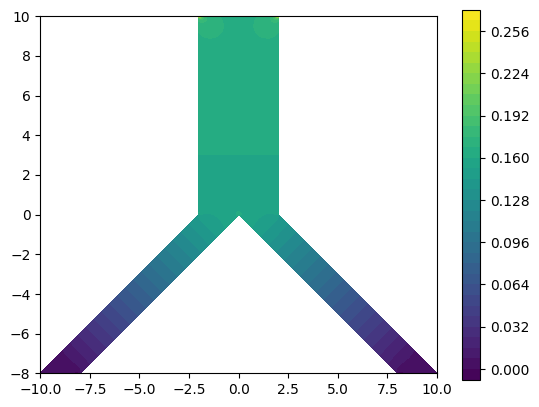

In [6]:
sol = plot(p)
plt.colorbar(sol)

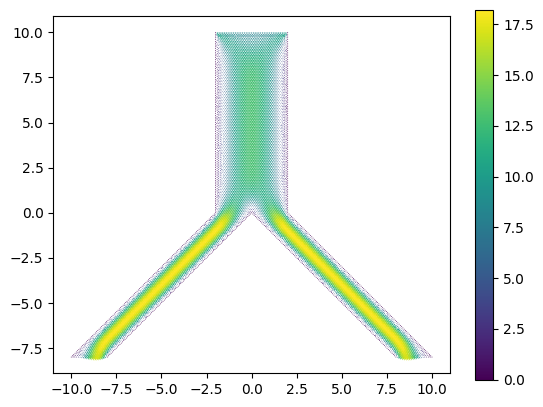

In [7]:
sol = plot(u)
plt.colorbar(sol)

In [15]:
flux = dot(u, n('+'))*dS
total_flux = assemble(flux)
total_flux

-167.6028807580894